In [ ]:
# Check the first few rows of the dataset
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)
# Load dataset (make sure the file path is correct)
df = pd.read_csv(path + '/Friday-WorkingHours-Morning.pcap_ISCX.csv')

100%|██████████| 230M/230M [00:05<00:00, 42.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [ ]:
# Display basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             191033 non-null  int64  
 1    Flow Duration                191033 non-null  int64  
 2    Total Fwd Packets            191033 non-null  int64  
 3    Total Backward Packets       191033 non-null  int64  
 4   Total Length of Fwd Packets   191033 non-null  int64  
 5    Total Length of Bwd Packets  191033 non-null  int64  
 6    Fwd Packet Length Max        191033 non-null  int64  
 7    Fwd Packet Length Min        191033 non-null  int64  
 8    Fwd Packet Length Mean       191033 non-null  float64
 9    Fwd Packet Length Std        191033 non-null  float64
 10  Bwd Packet Length Max         191033 non-null  int64  
 11   Bwd Packet Length Min        191033 non-null  int64  
 12   Bwd Packet Length Mean       191033 non-nul

In [ ]:
# Generate descriptive statistics
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,191033.000000,1.910330e+05,191033.000000,191033.000000,1.910330e+05,1.910330e+05,191033.000000,191033.000000,191033.000000,191033.000000,...,191033.000000,191033.000000,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05
mean,6756.069988,1.164499e+07,13.826548,16.413714,5.999468e+02,2.838565e+04,174.715803,23.897646,51.877418,50.194023,...,10.323735,25.585407,8.596271e+04,5.382912e+04,1.834991e+05,5.589691e+04,3.917041e+06,1.750674e+05,4.048164e+06,3.745754e+06
std,16697.438823,3.070084e+07,1097.755533,1479.792387,7.924198e+03,3.314538e+06,554.475223,41.909942,117.031845,160.454532,...,1046.038121,6.380665,8.681320e+05,4.929487e+05,1.333719e+06,7.628561e+05,1.388267e+07,2.167443e+06,1.424123e+07,1.370477e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.940000e+02,2.000000,1.000000,4.000000e+01,6.000000e+00,30.000000,0.000000,15.714286,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.112100e+04,2.000000,2.000000,7.000000e+01,1.520000e+02,42.000000,23.000000,38.112360,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.102840e+05,4.000000,2.000000,1.520000e+02,3.440000e+02,64.000000,42.000000,51.000000,20.124612,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,64948.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,198636.000000,56.000000,1.060000e+08,5.040000e+07,1.060000e+08,1.060000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


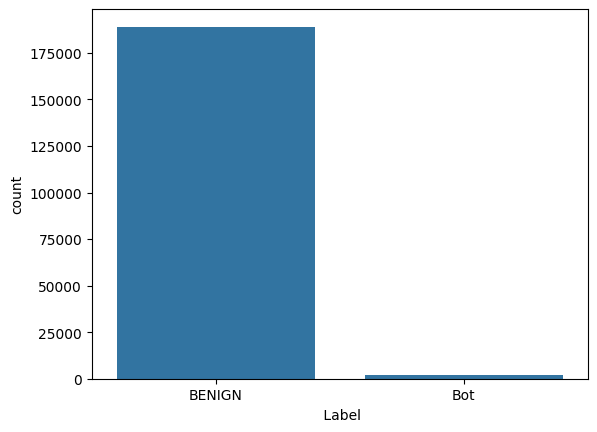

In [ ]:
# Explore the distribution of the target variable (assuming ' Label' is the target)
df[' Label'].value_counts()  # Note the leading space

# Visualize the distribution of the target variable
sns.countplot(x=' Label', data=df)  # Note the leading space
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame and ' Label' is your target column
label_counts = df[' Label'].value_counts()
label_percentages = (label_counts / len(df)) * 100

print("Label Distribution:")
label_percentages


Label Distribution:


,count
Label,
BENIGN,98.970858
Bot,1.029142


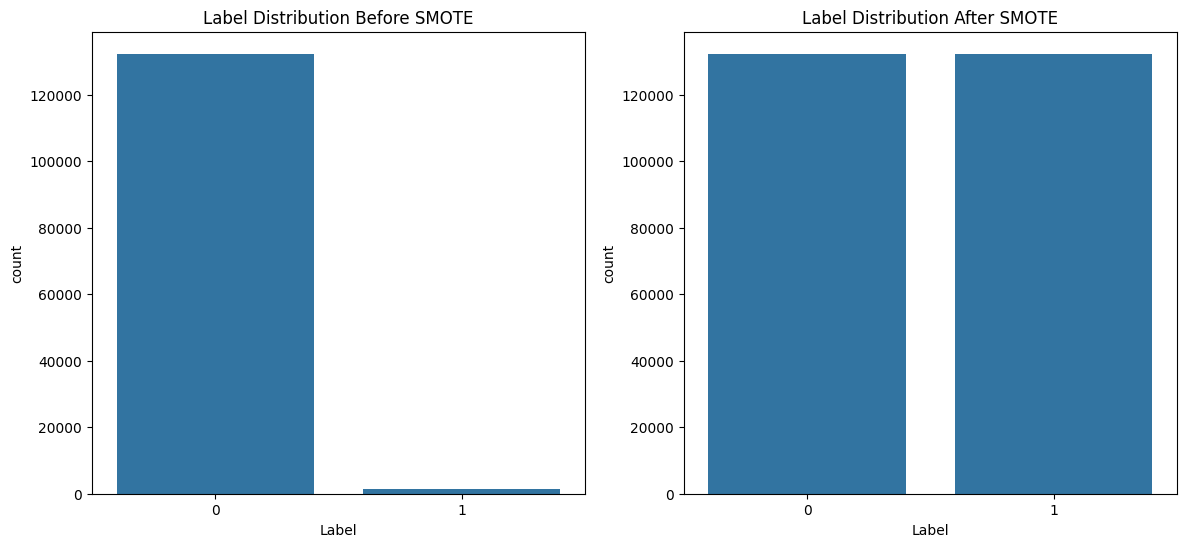

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is the original DataFrame and 'Label' column needs to be encoded
encoder = LabelEncoder()

# Encode labels
df['Label'] = encoder.fit_transform(df[' Label'])
df.drop(columns=[' Label'], inplace=True)

# Fill missing values
df.fillna(df.mean(), inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Feature selection
X = df.drop(columns=['Label'])
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values using SimpleImputer after train-test split
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply SMOTE to balance the label distribution on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualize label distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Label Distribution Before SMOTE")

# After SMOTE
sns.countplot(x=y_train_res, ax=ax[1])
ax[1].set_title("Label Distribution After SMOTE")

plt.show()

# Scale data after SMOTE
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [ ]:

# ML Models
ml_models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier()
}

ml_metrics = {}
for name, model in ml_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ml_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# DL Models
dl_models = {
    "ANN": Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Transformer": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "GRU": Sequential([
        GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Autoencoder": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "DNN": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

dl_metrics = {}
for name, model in dl_models.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    dl_metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using

Epoch 1/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8861 - loss: 88255.6172 - val_accuracy: 0.9893 - val_loss: 686.5547
Epoch 2/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9793 - loss: 787.0806 - val_accuracy: 0.9913 - val_loss: 66.1222
Epoch 3/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9834 - loss: 323.9879 - val_accuracy: 0.9916 - val_loss: 15.6404
Epoch 4/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9876 - loss: 93.7006 - val_accuracy: 0.9899 - val_loss: 4.7671
Epoch 5/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9890 - loss: 62.2546 - val_accuracy: 0.9900 - val_loss: 1.8884
Epoch 6/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 27.0037 - val_accuracy: 0.9900 - val_loss: 0.6939
Epoch 7/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9896 - loss: 5.3192 - val_accuracy: 0.9893 - val_loss: 0.5062
Epoch 8/20
3344/3344 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9

In [ ]:
# Convert results to DataFrame
ml_df = pd.DataFrame(ml_metrics).T
dl_df = pd.DataFrame(dl_metrics).T
combined_df = pd.concat([ml_df, dl_df])
print(combined_df)



                     Accuracy    R2 Score       MAE       MSE  F1 Score
Random Forest        0.990159   -0.009939  0.009841  0.009841  0.000000
Logistic Regression  0.328913  -67.869246  0.671087  0.671087  0.021523
SVM                  0.990159   -0.009939  0.009841  0.009841  0.000000
Naive Bayes          0.009841 -100.613475  0.990159  0.990159  0.019491
XGBoost              0.990159   -0.009939  0.009841  0.009841  0.000000
ANN                  0.990159   -0.009939  0.009841  0.009841  0.000000
Transformer          0.990159   -0.009939  0.009841  0.009841  0.000000
GRU                  0.990159   -0.009939  0.009841  0.009841  0.000000
Autoencoder          0.990159   -0.009939  0.009841  0.009841  0.000000
DNN                  0.990159   -0.009939  0.009841  0.009841  0.000000


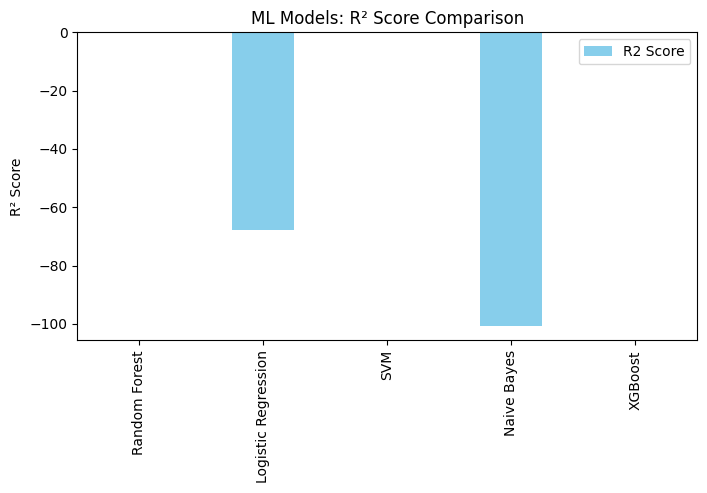

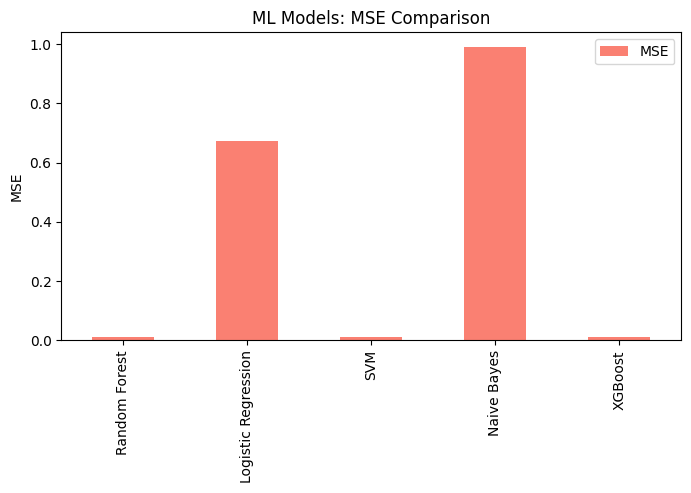

In [ ]:
import matplotlib.pyplot as plt

# Plot ML R2 comparison
ml_df[['R2 Score']].plot(kind='bar', figsize=(8, 4), title="ML Models: R² Score Comparison", color='skyblue')
plt.ylabel("R² Score")
plt.show()

# Plot ML MSE comparison
ml_df[['MSE']].plot(kind='bar', figsize=(8, 4), title="ML Models: MSE Comparison", color='salmon')
plt.ylabel("MSE")
plt.show()




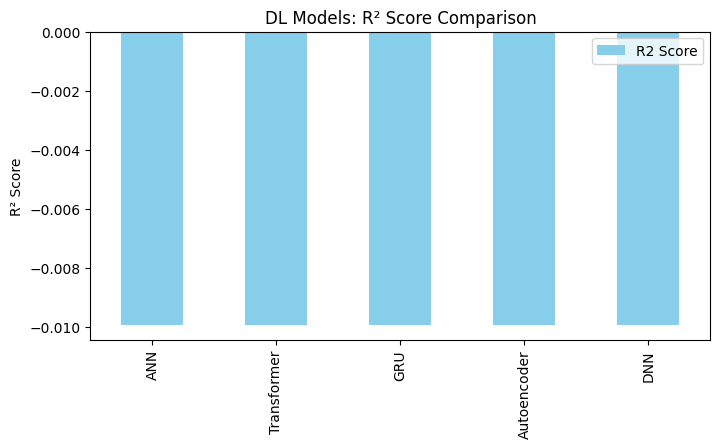

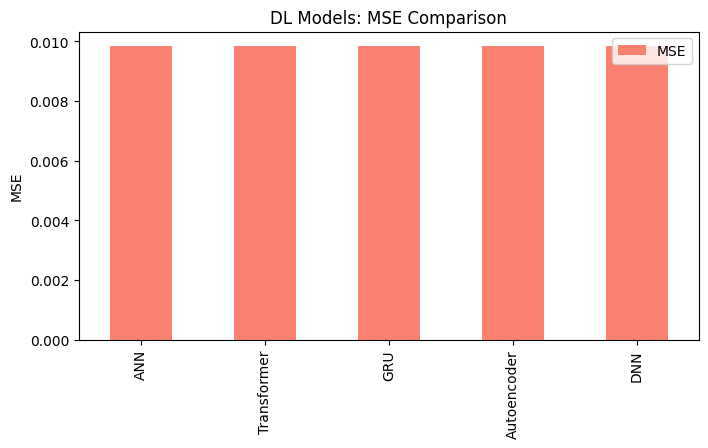

In [ ]:
# Plot DL R2 comparison
dl_df[['R2 Score']].plot(kind='bar', figsize=(8, 4), title="DL Models: R² Score Comparison", color='skyblue')
plt.ylabel("R² Score")
plt.show()

# Plot DL MSE comparison
dl_df[['MSE']].plot(kind='bar', figsize=(8, 4), title="DL Models: MSE Comparison", color='salmon')
plt.ylabel("MSE")
plt.show()



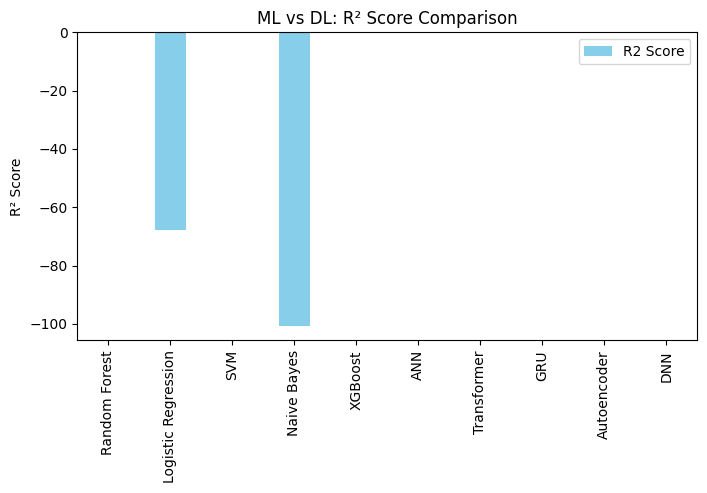

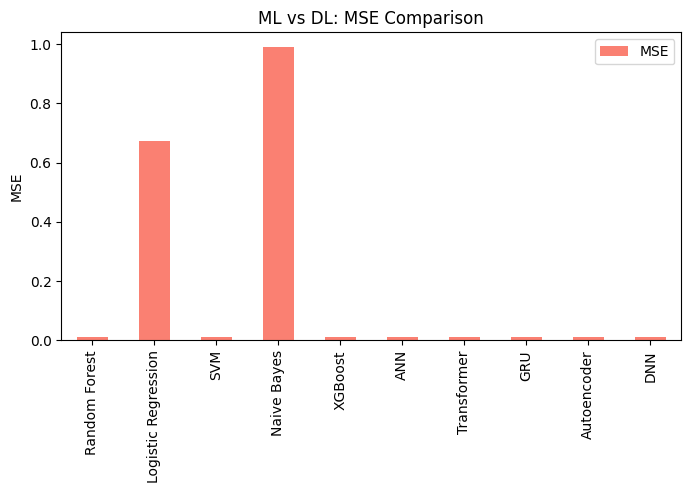

In [ ]:
# Plot Combined R2 comparison
combined_df[['R2 Score']].plot(kind='bar', figsize=(8, 4), title="ML vs DL: R² Score Comparison", color='skyblue')
plt.ylabel("R² Score")
plt.show()

# Plot Combined MSE comparison
combined_df[['MSE']].plot(kind='bar', figsize=(8, 4), title="ML vs DL: MSE Comparison", color='salmon')
plt.ylabel("MSE")
plt.show()